# Comparing Single vs. Multiple Linear Regression with Price Prediction

*By Danny Vu*

I will take a housing dataset which contains information about mean housing information per suburb in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library or Kaggle. 

### Objective 

The objective is to build a model that accurately predicts the mean value of prices in Boston given a certain set of features.

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which I will predict the value of a house.

**I will compare the error statistics of a Single Linear Regression Machine Learning Model vs a Multiple Linear Regression Machine Learning Model.**


### Feature Description:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 USD
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk —0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s USD




# Summary of Results:

I trained a linear regression machine learning model, tested it, and then calculated the error metrics for both a single vs double featured model. My 2-featured model showed much improvement if we compare the error metrics in our prediction. Take a comparing look at the error metrics in both the models:

| Type of Model | MSE | RMSE | R^2 |
| -------- | -------- | -------- | -------- |
| 1-feature (RM) | 35.4 | 5.9 | 0.23 |
| 2-feature (RM & LSTAT) | 18.0 | 4.2 | 0.61 |

The error metrics (MSE and RMSE) have both gone down while the R^2 accuracy of prediction has gone up. Our 2-featured model predicts much more accurately than the 1-featured model. The RMSE states that my 2-featured model has a +/- error range of 4.2 thousand US dollars.

This is a comparing visual of the two model predictions compared to the actual prices in our testing data:

<img src="data/2d-plot.png" alt="2 Features" style="width: 800px;"/>

<img src="data/3d-plot.png" alt="3 Features" style="width: 800px;"/>

Continue below to see the full analysis as well as a prediction on a data-set that doesn't have prices.


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# allowing for any single variable to print out without using the print statement:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
plt.rcParams['figure.figsize'] = (13, 8) # set default figure size...must set after matplotlib inline on a DIFFERENT cell

# make plot prettier
plt.style.use('ggplot')

In [3]:
# import the data used to train and test our model:
boston = pd.read_csv('data/train.csv')

In [4]:
boston.shape
boston.head()

(333, 15)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
# checking for any missing values
boston.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

C:\Users\danie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Median Home Value')

Text(0, 0.5, 'Distribution')

Text(0.5, 1.0, 'Distribution of Median Suburbian Home Values')

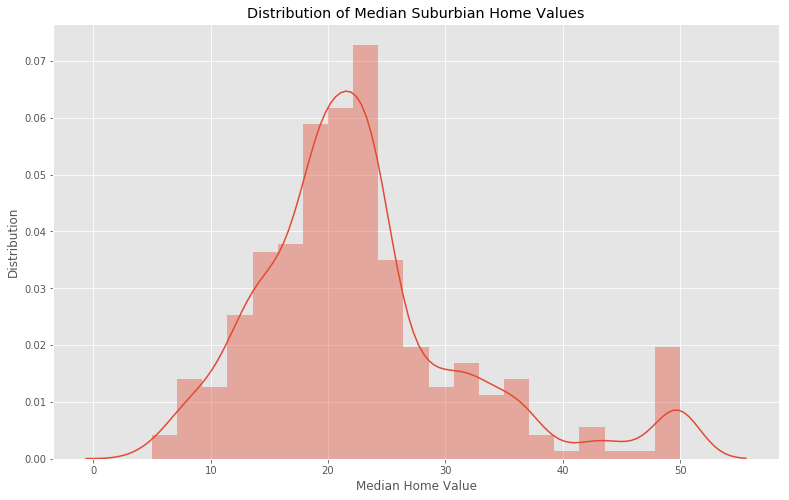

In [6]:
# doing a distribution plot of our median price values
sns.distplot(tuple(boston['medv']))
plt.xlabel('Median Home Value')
plt.ylabel('Distribution')
plt.title('Distribution of Median Suburbian Home Values')

Housing Prices look normally distributed. Let's take a look at those outliers:

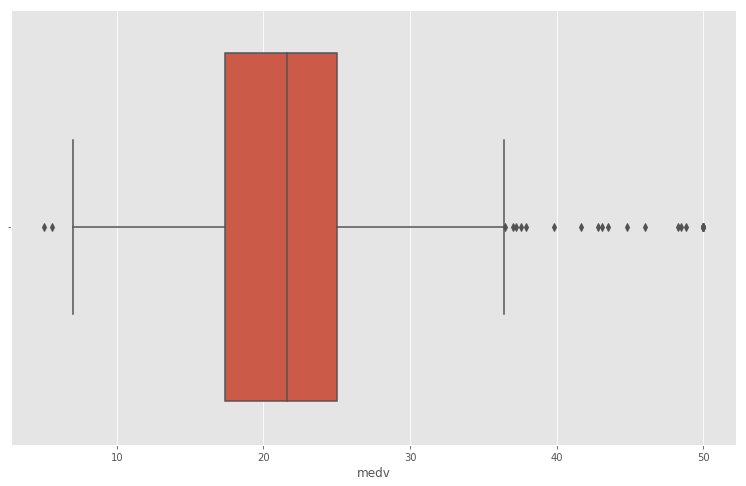

In [7]:
sns.boxplot(boston.medv)

Let's remove the outliers:

In [8]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [9]:
boston = boston[boston.medv.between(5, 40)]

In [10]:
boston.describe().medv

count    313.000000
mean      21.164537
std        6.783454
min        5.000000
25%       17.100000
50%       20.700000
75%       24.400000
max       39.800000
Name: medv, dtype: float64

Now, let's see what the correlation looks like between home prices and other variables.

In [11]:
# first, create a correlation matrix
correlation_matrix = boston.corr() # get correlation for all cols since all are integers

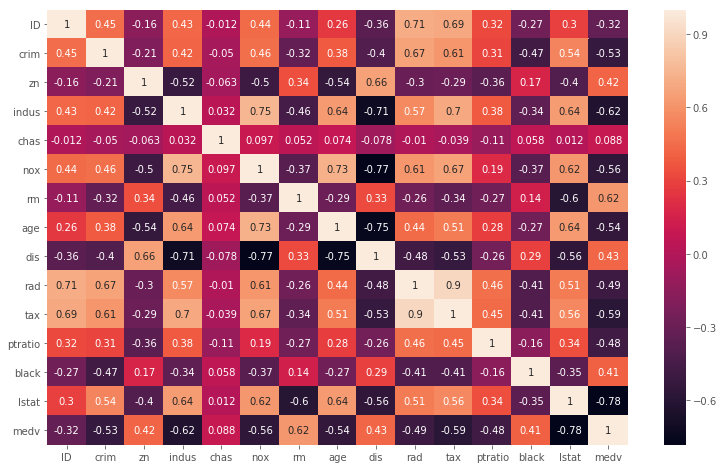

In [12]:
# then plot the heatmap:
sns.heatmap(correlation_matrix,annot=True)

Note, that `rad` and `tax` have the strongest correlation with each other at .9. We must make sure not to use those values in our model since the effects on each other might make it hard to distinguish between the effects on `medv`. So when Y is regressed against X and Z and where X and Z are highly positively correlated. Then the effect of X on Y is hard to distinguish from the effect of Z on Y because any increase in X tends to be associated with an increase in Z.

**Our strongest negative correlation is the percentage of lower status of the population (lstat).**

**Our strongest positive correlation with Median Value is the number of rooms that the homes have. Let's continue to explore this relationship:**

Text(0.5, 0, 'Number of Rooms')

Text(0, 0.5, 'Median Home Value')

Text(0.5, 1.0, 'Number of Rooms vs Median Home Value')

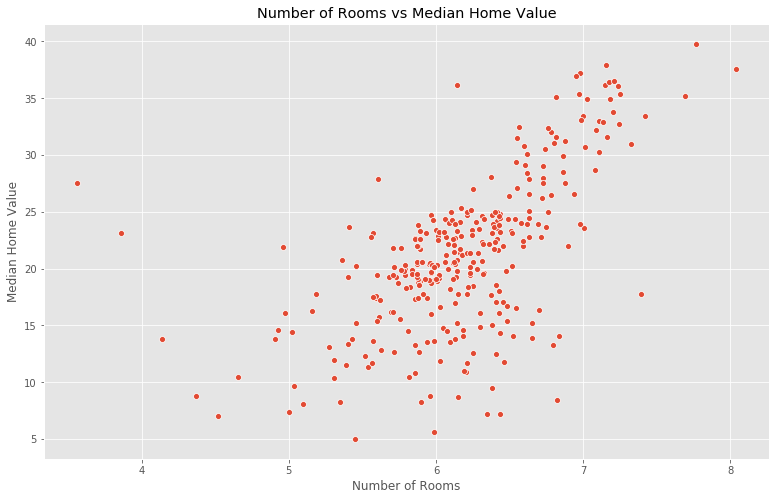

In [13]:
sns.scatterplot(boston.rm, boston.medv)
plt.xlabel('Number of Rooms')
plt.ylabel('Median Home Value')
plt.title('Number of Rooms vs Median Home Value')

It looks like the number of rooms and the median value of the homes fit a linear model. Let's create our linear model based on that feature.

# Creating and Training our Linear Model with 1 feature: number of rooms.

In [14]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split # this module helps to split our data into test and train sets

In [15]:
# setting our X: number of rooms
boston_X = boston.rm
boston_X.head()

# setting our Y: median house value
boston_Y = boston.medv
boston_Y.head()

0    6.575
1    6.421
2    6.998
3    7.147
4    6.012
Name: rm, dtype: float64

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

In [16]:
# Splitting our data and getting it ready for linear regression - X train / X Test -- Y train / Y test
# have to reshape it so that the array is a list of lists
# setting the test size to 20% and the training data to 80%
# random_state is like seed - so the same test data will be generated
boston_X_train, boston_X_test, boston_Y_train, boston_Y_test = train_test_split(boston_X.values.reshape(-1,1), boston_Y.values.reshape(-1,1), test_size=0.20, random_state=42)

In [17]:
# create our linear regression object
regr = linear_model.LinearRegression()

In [18]:
# train the model using our training data
# this object we created will change the state and have a new model built inside of it using the data we pass.
regr.fit(boston_X_train, boston_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# These are the coefficients we got. In this example, we got a line - Coefficient is also the name for B1 - our slope. 
# in this example, we only have one feature - ROOMS - so we only got 1 coefficient. 1 B1. Other times we can get B1, B2, B3
'Coefficients:'
regr.coef_

# intercept we got or B0 is:
'Intercept:'
regr.intercept_

'Coefficients:'

array([[7.3132894]])

'Intercept:'

array([-24.15780645])

# Evaluating our 1-featured Model

In [20]:
# make prediction using the testing data X to predict our Y - so we can calculate our error. It uses the previous object with the updated model state inside of it, and then save the predictions to our new variable.
# we will then calculate our error using the ACTUAL Y afterwards.
boston_Y_pred = regr.predict(boston_X_test)

Text(0.5, 0, 'Number of Rooms')

Text(0, 0.5, 'Median Home Value in Thousands of USD')

Text(0.5, 1.0, 'Actual vs Predicted Values - Single LinReg Model')

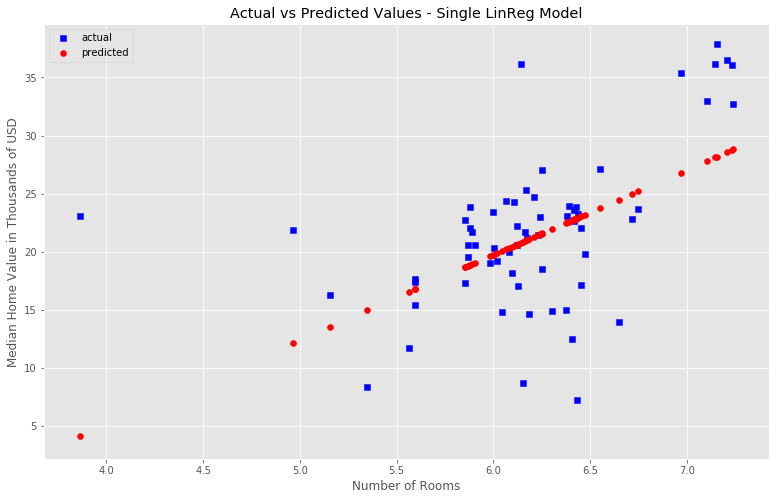

In [21]:
# plotting the prediction vs the actual in our test:
fig = plt.figure()

# subplot - It's the arrangement of subgraphs within this graph. The first number is how many rows of subplots; the second number is how many columns of subplots; the third number is the subgraph you're talking about now. In this case, there's one row and one column of subgraphs (i.e. one subgraph) and the axes are talking about the first of them. Something like fig.add_subplot(3,2,5) would be the lower-left subplot in a grid of three rows and two columns
ax1 = fig.add_subplot(111)

ax1.scatter(boston_X_test, boston_Y_test, c='b', marker="s", label='actual')
ax1.scatter(boston_X_test, boston_Y_pred, c='r', marker="o", label='predicted')
plt.legend(loc='upper left')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Home Value in Thousands of USD')
plt.title('Actual vs Predicted Values - Single LinReg Model')
plt.show()

### Finding Error in our 1-featured Model

In [22]:
# importing libraries for calculating error
from sklearn.metrics import mean_squared_error, r2_score # modules needed for MSE and r2_score

In [23]:
# calculating the MEAN SQUARED ERROR using our ACTUAL TEST data and PREDICTIONS:
'Mean Squared Error'
mean_squared_error(boston_Y_test, boston_Y_pred)

'Mean Squared Error'

35.367016630044866

In [24]:
# getting the RMSE is easy now - this is in our correct units
"Root Mean Squared Error - in Thousands of USD"
np.sqrt(mean_squared_error(boston_Y_test, boston_Y_pred))

'Root Mean Squared Error - in Thousands of USD'

5.947017456679009

In [25]:
# calculating the R**2 - which tells us from 0-1 how well our model predicts - how much variation the line is able to capture.
'R^2 Score:'
r2_score(boston_Y_test, boston_Y_pred)

'R^2 Score:'

0.2284604208055615

# Retraining our model using 2 features - RM & LSTAT

Recall, LSTAT had the strongest negative correlation. Let's retrain our model using this feature as well.

Text(0.5, 1.0, 'Correlation between Number of Rooms, Lower Income Percentage, & Median House Value')

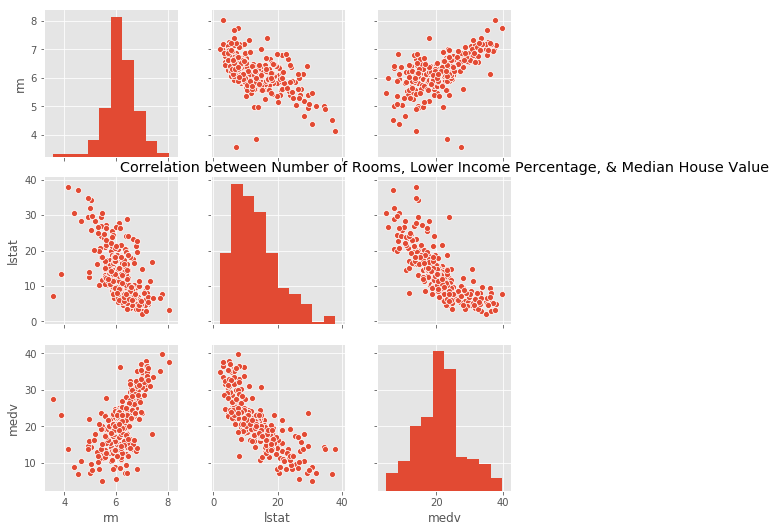

In [26]:
# plotting the features we will compare in a pairplot:
sns.pairplot(boston[['rm','lstat','medv']])

plt.title('Correlation between Number of Rooms, Lower Income Percentage, & Median House Value')

In [27]:
# setting our X features (with 2 features this time in a 2 column dataframe!)
boston_X = boston[['rm', 'lstat']]
boston_X.head()

# setting our Y: median house value
boston_Y = boston.medv
boston_Y.head()

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,6.998,2.94
3,7.147,5.33
4,6.012,12.43


0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

In [28]:
# Splitting our data and getting it ready for linear regression
# this time, we have two sets of X features - so we reshape it with unknown (-1) rows, but 2 COLUMNS this time
boston_X_train, boston_X_test, boston_Y_train, boston_Y_test = train_test_split(boston_X.values.reshape(-1,2), boston_Y.values.reshape(-1,1), test_size=0.20, random_state=42)

In [29]:
# check out our new train and test data that has 2 features:
boston_X_train[0:5]
boston_X_test[0:5]

array([[ 5.822, 15.03 ],
       [ 6.212, 17.6  ],
       [ 6.193, 21.52 ],
       [ 5.891, 10.87 ],
       [ 6.316,  5.68 ]])

array([[ 5.594, 13.09 ],
       [ 6.096, 10.26 ],
       [ 5.869,  9.8  ],
       [ 6.064, 14.66 ],
       [ 6.121,  8.44 ]])

In [30]:
# create a new linear regression object
regr2 = linear_model.LinearRegression()

In [31]:
# train the new model using our training data with 2 features
regr2.fit(boston_X_train, boston_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# These are the NEW coefficients and NEW slope we got. 
'Coefficients:'
regr2.coef_

'Intercept:'
regr2.intercept_

'Coefficients:'

array([[ 2.65194788, -0.59639606]])

'Intercept:'

array([12.48492134])

Notice we have 2 coefficients this time in our equation for the line whereas previously, we only had 1 coefficient for the equation for our line. 

The equation for our first line was this: `Y = B1X + B0`. 

Now, with two features, our equation would look like this: `Y = B1X1 + B2X2 + B0` - or more specifically: 

`MEDV = 2.65*RM + -0.59*LSTAT + 12.485`

# Evaluating our 2-featured Model

In [33]:
# make prediction using our new model and the testing data X to predict our Y
boston_Y_pred = regr2.predict(boston_X_test)

Text(0.5, 0, '# Rooms')

Text(0.5, 0, 'Price')

Text(0.5, 0, '% Low Income')

Text(0.5, 0.92, 'Actual vs Predicted Values - Double LinReg Model')

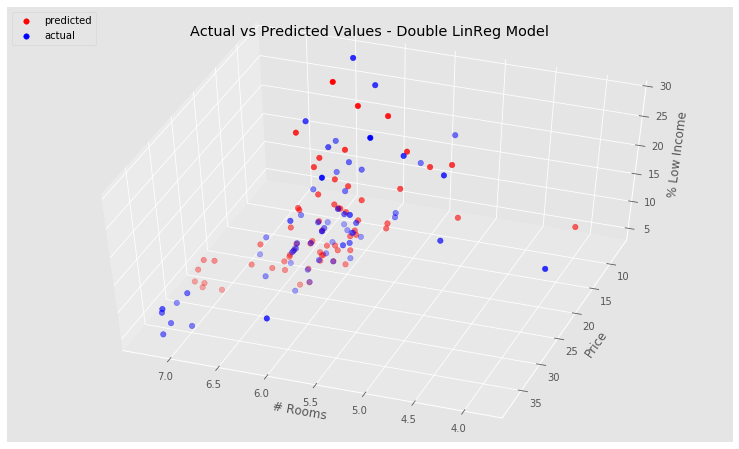

In [34]:
# Plot the prediction vs actual in a 3d scatter plot in our segmented test data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# adding X (rm), Y (predicted price), Z (lstat) data in that order for our PREDICTED prices
ax.scatter(boston_X_test[0:,0], boston_Y_pred, boston_X_test[0:,1], c='red', s=30, label='predicted')

# adding X (rm), Y (ACTUAL price), Z (lstat) data in that order for our ACTUAL prices
ax.scatter(boston_X_test[0:,0], boston_Y_test, boston_X_test[0:,1], c='blue', s=30, label='actual')

# setting the ROTATION in 3d space
ax.view_init(50, 110)

plt.legend(loc='upper left')
ax.set_xlabel('# Rooms')
ax.set_ylabel('Price')
ax.set_zlabel('% Low Income')

plt.title('Actual vs Predicted Values - Double LinReg Model')

plt.show()

### Finding the Error Metrics in our 2-featured Model

In [35]:
# calculating the MEAN SQUARED ERROR:
'Mean Squared Error'
mean_squared_error(boston_Y_test, boston_Y_pred)

'Mean Squared Error'

18.02951815450509

In [36]:
"Root Mean Squared Error - in Thousands of USD"
np.sqrt(mean_squared_error(boston_Y_test, boston_Y_pred))

'Root Mean Squared Error - in Thousands of USD'

4.246118009959814

In [37]:
# calculating the R**2 - which tells us from 0-1 how well our model predicts - how much variation the line is able to capture.
'R^2 Score:'
r2_score(boston_Y_test, boston_Y_pred)

'R^2 Score:'

0.6066819263972592

So, our 2-featured model has shown much improvements. Take a comparing look at our error metrics in both the models:

| Type of Model | MSE | RMSE | R^2 |
| -------- | -------- | -------- | -------- |
| 1-feature (RM) | 35.4 | 5.9 | 0.23 |
| 2-feature (RM & LSTAT) | 18.0 | 4.2 | 0.61 |

**Our error metrics (MSE and RMSE) have both gone down while the R^2 accuracy of prediction has gone up. Our 2-featured model predicts much more accurately than the 1-featured model. The RMSE states that our 2-featured model has a +/- range of 4.2 thousand US dollars.**


# Predicting Median Home Prices for Other Boston Suburbs Using our Model

In [38]:
# importing the new data that is missing the MEDV (median value) column:
boston_pred = pd.read_csv('data/test.csv')

In [39]:
# notice, how these don't have a medv column:
boston_pred.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [48]:
boston_pred.shape

(173, 16)

In [40]:
# gathering our new X axis data - 1 feature
boston_X_test1 = boston_pred.rm

In [41]:
# gathering our new X axis data - 2 feature
boston_X_test2 = boston_pred[['rm', 'lstat']]

In [42]:
# reshaping them so they fits in our model:
boston_X_test1 = boston_X_test2.values.reshape(-1, 1)
boston_X_test2 = boston_X_test2.values.reshape(-1, 2)

In [43]:
# using this data to predict our Y value - MEDV - 1 feature model:
boston_Y_finalpred_1 = regr.predict(boston_X_test1)

# using this data to predict our Y value - MEDV - 2 feature model:
boston_Y_finalpred_2 = regr2.predict(boston_X_test2)

In [44]:
# adding our predicted values to our original dataframe
boston_pred['medv_1feat'] = pd.DataFrame(boston_Y_finalpred_1)
boston_pred['medv_2feat'] = pd.DataFrame(boston_Y_finalpred_2)

In [45]:
boston_pred.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_1feat,medv_2feat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,28.388178,29.135691
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,5.314750,26.429723
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,22.866644,17.431759
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,13.944431,9.567906
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,20.979816,18.208844


In [51]:
boston_pred.medv_1feat.describe()

count    173.000000
mean      41.806331
std       39.629476
min      -10.116291
25%       19.166120
50%       24.417062
75%       52.631732
max      201.164640
Name: medv_1feat, dtype: float64

In [52]:
boston_pred.medv_2feat.describe()

count    173.000000
mean      21.544282
std        5.684783
min        4.260003
25%       18.448179
50%       21.652333
75%       25.608250
max       32.614089
Name: medv_2feat, dtype: float64

Text(0.5, 1.0, 'Price Prediction - Single Linear Regression Model')

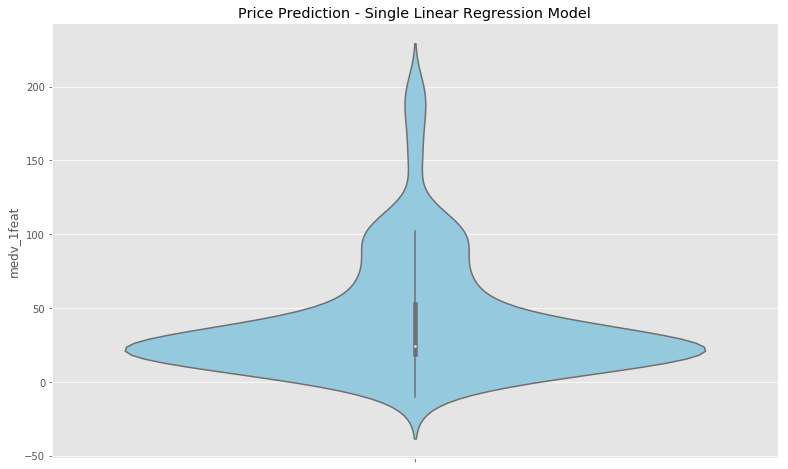

In [56]:
# plotting our predicted prices using our single linear regression model:
sns.violinplot(y = boston_pred.medv_1feat, color='skyblue')

plt.title('Price Prediction - Single Linear Regression Model')

Text(0.5, 1.0, 'Price Prediction - Double Linear Regression Model')

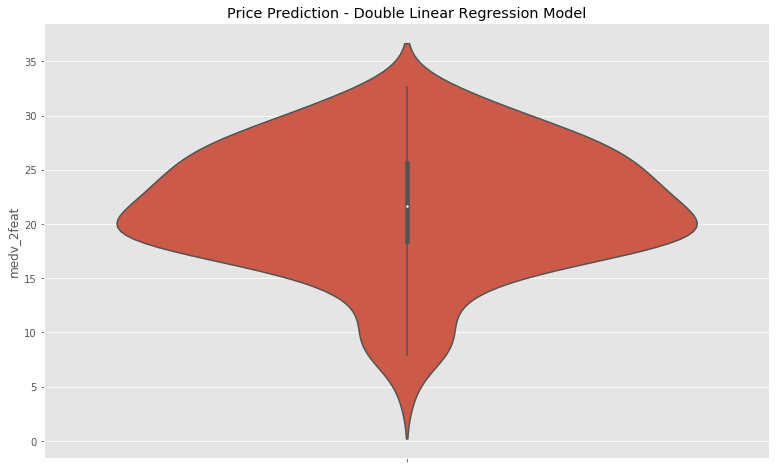

In [53]:
# plotting our predicted prices using our double linear regression model:
sns.violinplot(y = boston_pred.medv_2feat)

plt.title('Price Prediction - Double Linear Regression Model')

# Conclusion

Our 2-feature model has a much better distribution of predicted prices than our 1-feature machine learning model. Not only does the distribution look better, but the predicted prices make much more sense (the 1-feature model predicted some negative prices!):

**1 Feature Model Price Prediction Statistics:**
```
count    173.000000
mean      41.806331
std       39.629476
min      -10.116291
25%       19.166120
50%       24.417062
75%       52.631732
max      201.164640
```

**2 Feature Model Price Prediction Statistics:**
```
count    173.000000
mean      21.544282
std        5.684783
min        4.260003
25%       18.448179
50%       21.652333
75%       25.608250
max       32.614089
```